$
\newcommand{\RR}{\mathbf{R}}
\newcommand{\ZZ}{\mathbf{Z}}
\newcommand{\NN}{\mathbf{N}}
\newcommand{\e}{\mathrm{e}}
\newcommand{\eps}{\varepsilon}
$
## Number Systems
### prob 1

Convert to [radix](https://en.wikipedia.org/wiki/Radix) $10$: $(1011011.001)_2$.

In [ ]:
# represent (1011011.001)_2 as a "float"
mantissa = [1,0,1,1,0,1,1,0,0,1]
exponent = 7

# init decimal rep
c = 0

# add powers of 2 to decimal rep
for i in range(len(mantissa)):
    c = c + mantissa[i]*(2^(-i-1))
    
# shift decimal pt by necessary exponent
c = c*2^exponent

print(str(c) + " = " + str(n(c)))

Convert to radix $2$: $(2018)_{10}$.

In [ ]:
# integer to be converted
m = 2018

# find the greatest i s.th. 2**i < m
i = 0
while m > 2**i:
    i = i + 1
i = i - 1

# initialize empty list and counter
c = []
N = 0

# remove powers of 2 from m, create binary rep
while m != 0 and N < 15: # note stopping condition
    if m >= 2**i:
        m = m - 2**i
        c.append(1)
    else:
        c.append(0)
    i += -1
    N += 1
print(str(c)+"_2")

### prob 2

The floating point representation of a real number is $x=\pm
(0.d_{1}d_{2}\ldots d_{n})_\beta\cdot \beta^e$, where
$d_{1}\not=0$, $-M\leq e\leq M$. Suppose that $\beta=2$, $n=6$,
$M=5$.

Here's the smallest (positive) number in this floating point system.

In [ ]:
# represent (0.100000)_2 * 2^-5 as a "float"
mantissa = [1,0,0,0,0,0]
exponent = -5

# create decimal rep
c = 0
for i in range(len(mantissa)):
    c = c + mantissa[i]*(2^(-i-1))
c = c*2^exponent

print(str(c) + " = " + str(n(c)))

Here's the largest number.

In [ ]:
# represent (0.111111)_2 * 2^5 as a "float"
mantissa = [1,1,1,1,1,1]
exponent = 5

# create decimal rep
c = 0
for i in range(len(mantissa)):
    c = c + mantissa[i]*(2^(-i-1))
c = c*2^exponent

print(str(c) + " = " + str(n(c)))

### prob 4

In [ ]:
def convert_to_binary(n): ## n must be a natural number
    q = [n]
    a = []
    j = 0
    while q[-1] != 0:
        q.append(q[j] // 2)
        a.append(q[j] % 2)
        j = j + 1
    print(str(list(reversed(a)))+'_2')

In [ ]:
convert_to_binary(4)

In [ ]:
convert_to_binary(56)

In [ ]:
convert_to_binary(1543)

## Finite Precision Arithmetic

### prob 3

Near certain values of $x$ each of the following functions
cannot be accurately  computed using the formula as given due to
cancellation error. Identify the values of $x$ which are involved
(e.g. near $x=0$ or large positive $x$) and propose a
reformulation of the function (e.g., using Taylor series,
rationalization, trigonometric identities, etc.) to remedy the
problem.

**Example.** The function $f(x)=1+\cos x$ cannot be computed accurately on the open balls $V_\eps(x)$ with $x \in \{2k\pi+\pi: k \in \ZZ\}$ for small $\eps$. 

For example, given $\eps = 10^{-7}$, on the open ball $V_\eps(\pi)$, we have

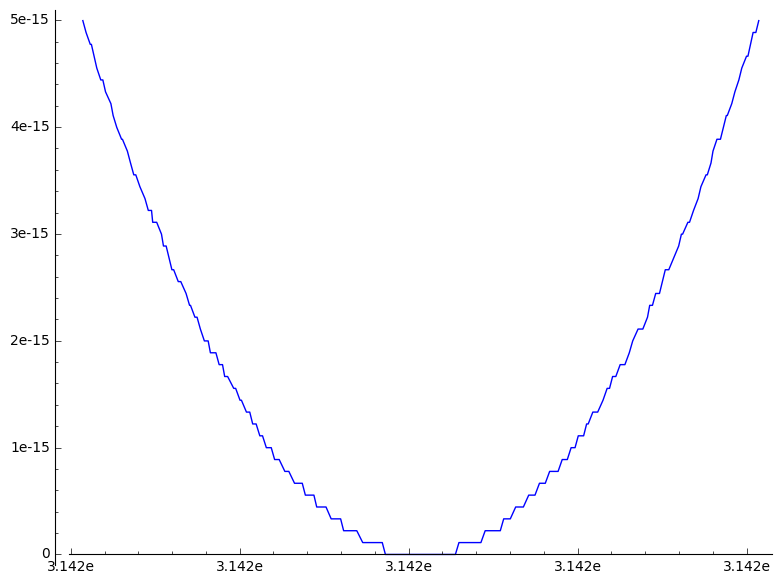

In [9]:
f = 1 + cos(x)
eps = 10^(-7)
plot(f, (x,pi-eps, pi+eps))

We can, however, approximate $f$ about all $x \in \{2k\pi+\pi: k \in \ZZ\}$ with a truncated Taylor series representation. Consider $x$ about $\pi$.

-1/24*(pi - x)^4 + 1/2*(pi - x)^2


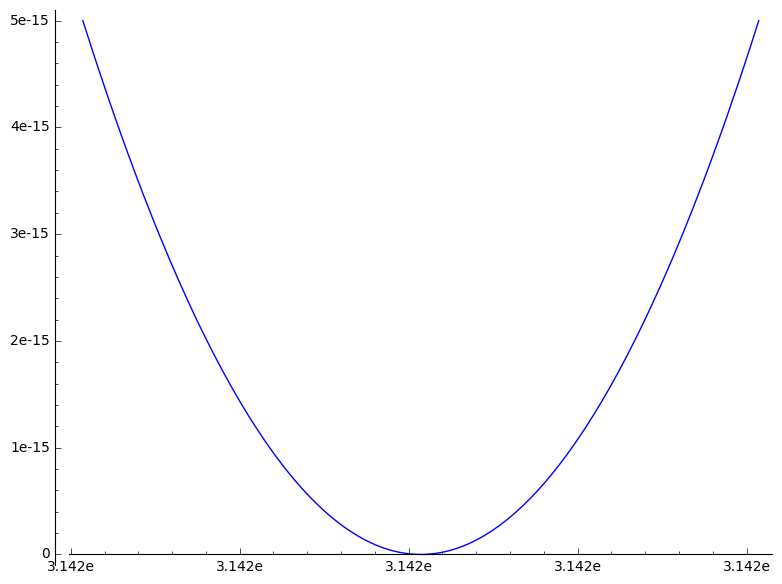

In [10]:
print f.taylor(x, pi, 4)
plot(f.taylor(x, pi, 4), (x,pi-eps, pi+eps))

**Example.** Consider $f(x)=\e^{-x}+\sin x-1$.

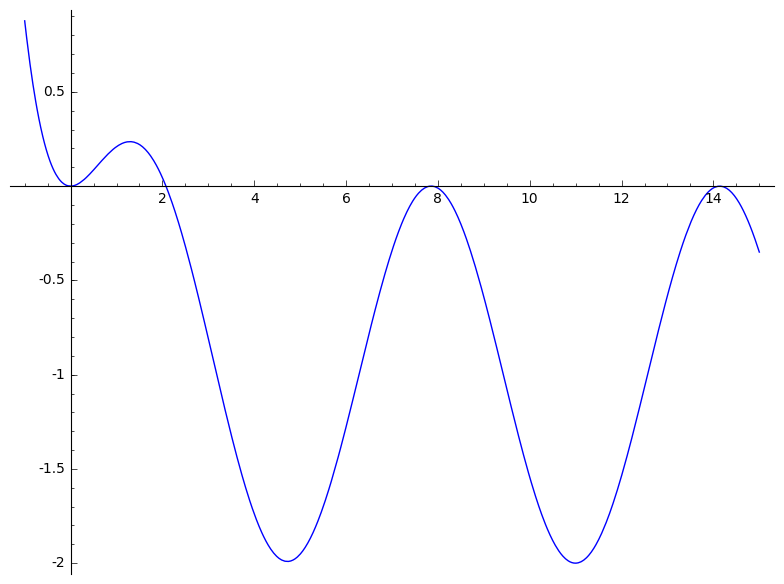

In [22]:
f = e^(-x) + sin(x) - 1
plot(f, (x, -1, 15))

We are looking for roots of multiplicity greater than $1$, as near these roots to compute $f$ we must subtract close numbers. 

Equivalently, we're looking for open balls $V_\eps(x)$ where $f(x) = 0$ and $f'(x) \approx 0$.

- $V_\eps(0)$ is such an open ball. 
- We don't care about the root near $2$, as $|f'(x)|_{x\approx 2}$ is large.
- There are roots near $7.10000000008731$ and $7.85000000006985$, but the slope of $f$ is large enough to prevent significant cancellation of digits. 
- For $x > 10$, the transient term $e^{-x}$ is negligible, and "problematic" open balls are thus $V_\eps(x)$ with $x \in \{2k\pi+\pi/2 : k \in \NN, k > 2\}$.

Aside: On my hardware, what's the least $M$ such that $\e^{-x}+\sin x-1$ computes to a value less than or equal to $0$ for all $x > M$? I feel like I need to know the difference between [machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon) and the [unit in the last place](https://en.wikipedia.org/wiki/Unit_in_the_last_place).

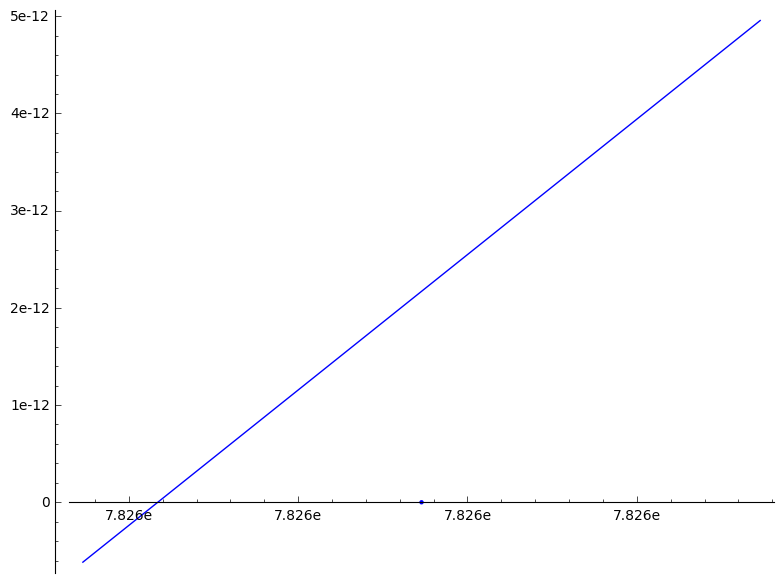

In [34]:
# plot "non-problematic" root
a = 7.1
b = 7.85
eps = 10^(-10)
p = bisect(f, a, b, eps, 50)
point((p,0), ) + plot(f, (x, p - eps, p + eps))

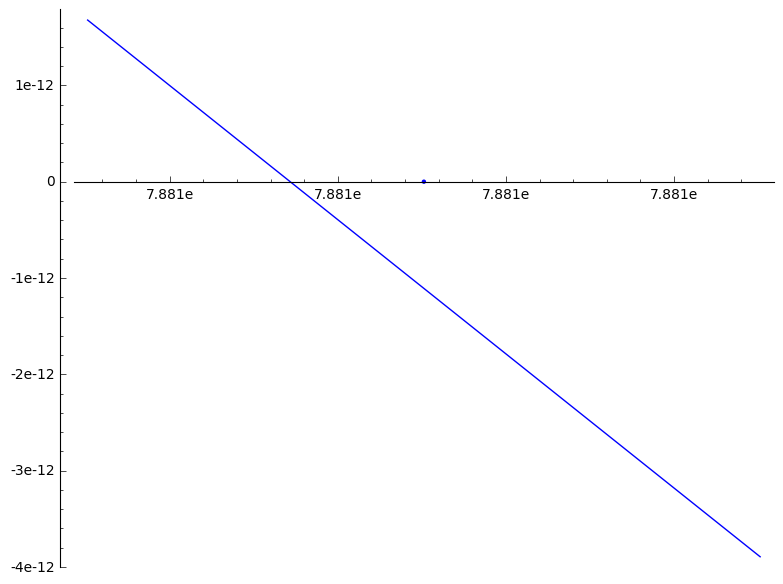

In [30]:
# plot another "non-problematic" root
a = 7.85
b = 8
eps = 10^(-10)
p = bisect(f, a, b, eps, 50)
point((p,0), ) + plot(f, (x, p - eps, p + eps))

In [ ]:
# TODO plot problematic roots and expand taylor series for correction.

$f(x)=\ln x-\ln(1/x)$

$f(x)=\sqrt{x^2+1}-\sqrt{x^2+4}$

$f(x)=1-2\sin^2x$

$f(x)=\ln(x+\sqrt{x^2+1})$

### prob 5

Use three-digit rounding arithmetic to compute the following
sums (sum in the given order).

Hint: use floating point representation, e.g. $\frac{1}{3^6}=0.001371742112483 \approx 0.137\times 10^{-2}$ but not $0.001$. 

$\sum_{k=1}^6\frac{1}{3^k}$

$\sum_{k=1}^6\frac{1}{3^{7-k}}$

## Finite Difference Approximation
### prob 6

Let $f(x)$ be a given function and recall the forward difference approximation of $f'(x)$
$$
D_+f(x)=\frac{f(x+h)-f(x)}{h},
$$
where $h>0$ is the step size.

Take $f(x)=\sin x$, $x=\pi/4$, $h=2^{-n}$ for $n=1,2,\ldots,6$. 

Plot the error versus $h$ (use a log-log plot) and print the following information


- $h$
- $D_+f$
- $f'(\pi/4)-D_+f$
- $(f'(\pi/4)-D_+f)/h$
- $(f'(\pi/4)-D_+f)/{h^2}$
- $(f'(\pi/4)-D_+f)/{h^3}$


Repeat for central difference approximation,
$$
D_0f(x)=\frac{f(x+h)-f(x-h)}{2h},
$$
which also approximates $f'(x)$. 

Which approximation is more accurate?

### prob 7

The forward and backward finite-difference operators are defined by
- $D_+f(x)=\frac{f(x+h)-f(x)}{h}$
- $D_-f(x)=\frac{f(x)-f(x-h)}{h}$

Show that $D_+D_-f(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$.

Use Taylor expansions and the previous result to show that $D_+D_-f(x)=f''(x)+O(h^2)$. Find the asymptotic error constant.

## Rootfinding
### prob 8

Consider $f(x) = x^2 - 5$. Since $f(2) < 0$, $f(3) > 0$, 
it follows that $f(x)$ has a root $p$ in the
interval $(2, 3)$. Compute an approximation to $p$ 
by the following methods. Take $10$ steps in
each case. Print the answers to $15$ digits.

Print the following information for each method. Do the results agree
with the theory discussed in class?
- $n$ (step)
- $x_n$ (approximation)
- $f(x_n)$  (residual)
- $|p - x_n|$  (error)

bisection method, starting interval $[a, b] = [2, 3]$

fixed-point iteration with $g_1(x) = 5/x$ and $g_2(x) = x - f(x)/3$, starting value $x_0 = 2.5$

Newton's method, starting value $x_0 = 2.5$.

### prob 9 

Consider the function $g(x)=2x(1-x)$.

Verify $x=0$ and $x=1/2$ are fixed points of $g(x)$.

Why should we expect that fixed point iteration, starting even with a value very close to zero, will fail to converge toward $x=0$?

Why should we expect that fixed point iteration, starting with $p_0\in(0,1)$ will converge toward $x=1/2$? What order of convergence should we expect?

Perform seven iterations starting from an arbitrary $p_0\in(0,1)$ and numerical confirm the order of convergence.

### prob 10 (suggested)

Plot the function $f(x)=1-\cos x$ over the interval $-5\times 10^{-8}\leq x\leq 5\times 10^{-8}$. Generate points at 1001 uniformly spaced abscissas and perform all calculations in IEEE standard double precision.

Reformulate $f$ to avoid cancellations error and then repeat the previous arithmetic.

### prob 11 (suggested) 
Verify that $x=\sqrt{a}$ is a fixed point of the function
$$
g(x)=\frac 12 \left(x+\frac ax\right).
$$
Use the techniques of Section 2.3 to determine the order of convergence and the asymptotic error constant of the sequence $p_n=g(p_{n-1})$ toward $x=\sqrt a$.